In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats.mstats import winsorize

C:\Users\manda\Miniconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("Datasets\Train.csv").set_index('id')

In [3]:
df

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,2015-09-01,0.06,3,0
2243769,Super Bowl New York City Apartment,11460768,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1,0,NaN,NaN,1,0
35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4,2019-07-05,4.00,1,365
36202006,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0,NaN,NaN,4,82
3780951,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,2019-05-26,0.27,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28342248,Ridgewood retreat,120730056,Sophie,Queens,Ridgewood,40.70602,-73.90485,Entire home/apt,80,5,2,2018-09-30,0.21,1,0
8438775,Private BR & Bath near Central Park,41042927,Gabi,Manhattan,Upper West Side,40.77697,-73.97698,Private room,137,1,163,2019-06-28,3.55,1,32
27332770,Warm Home w/ Private Garden (Inwood Manhattan ...,80381355,Mary,Manhattan,Inwood,40.86912,-73.92183,Entire home/apt,195,2,6,2019-03-31,0.53,1,0


## NULL

In [5]:
df.isna().sum()

name                                12
host_id                              0
host_name                           13
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6982
reviews_per_month                 6982
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [4]:
def handle_null(df):
    df['reviews_per_month'].fillna(0,inplace=True)
    df['last_review'].fillna('2010-04-20',inplace=True)
    df.drop(['name','host_name','host_id'],axis=1,inplace=True)
    print(df.isna().sum())
handle_null(df)

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [5]:
num = df.select_dtypes(exclude=object).columns
cat = df.select_dtypes(include=object).columns

## Outliers

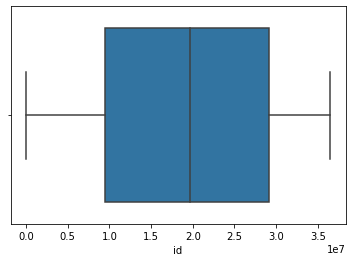

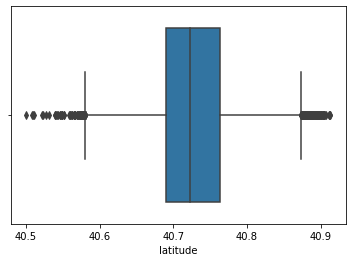

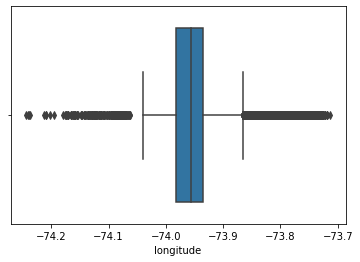

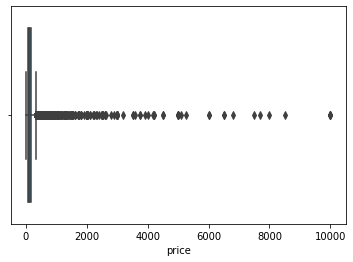

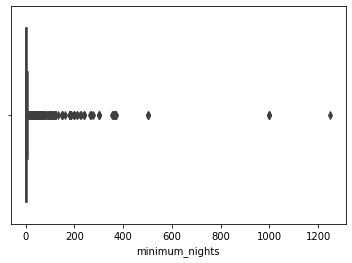

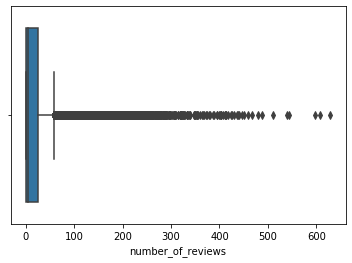

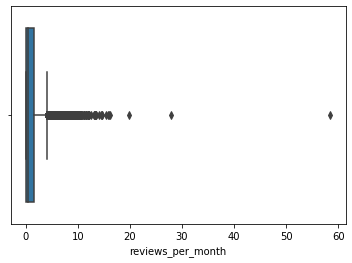

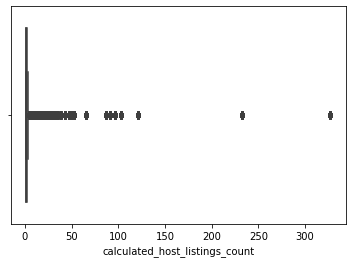

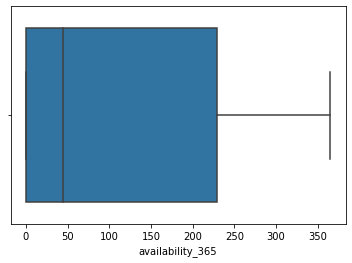

In [13]:
for col in num:
    sns.boxplot(df[col])
    plt.show()

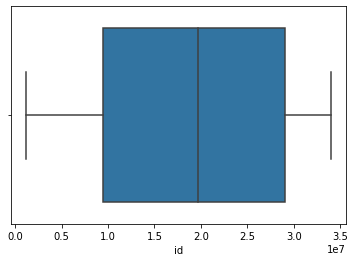

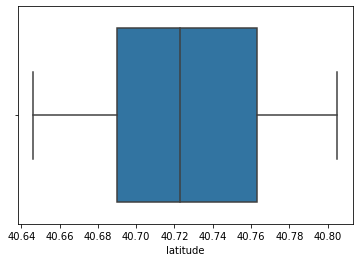

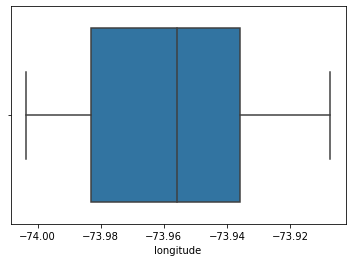

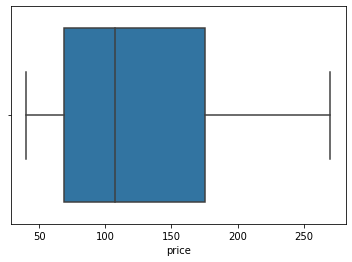

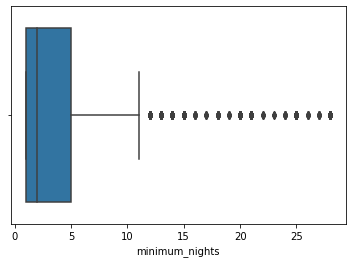

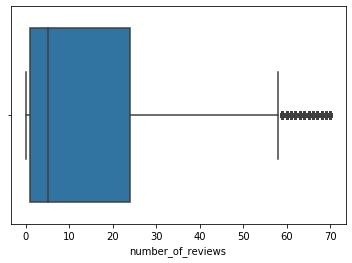

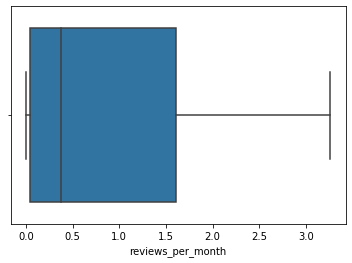

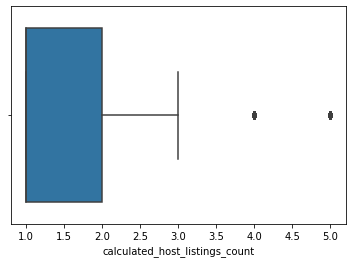

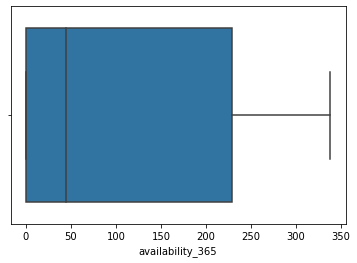

In [20]:
for col in num:
    sns.boxplot(treated_df[col])
    plt.show()

In [6]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])   
    for column in cols:
        if column in dataframe.columns:
            q1 = dataframe[column].quantile(0.25) 
            
            q3 = dataframe[column].quantile(0.75)
            
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

In [9]:
# Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    new_datafr = dataframe.copy()
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            new_datafr[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    return new_datafr    


In [7]:
detect_outliers(df[num])

,Feature,Number of Outliers
0,latitude,301
1,longitude,1965
2,price,2114
3,minimum_nights,4581
4,number_of_reviews,4243
5,reviews_per_month,2235
6,calculated_host_listings_count,4930
7,availability_365,0


In [11]:
treated_df = treat_outliers(df)

## SKEW

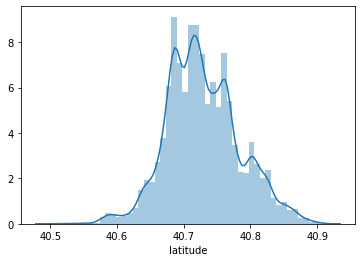

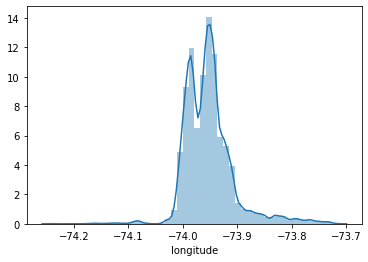

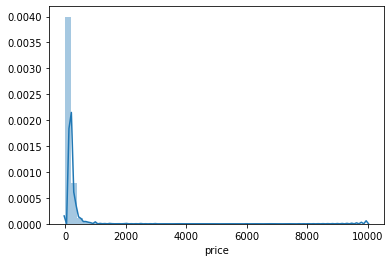

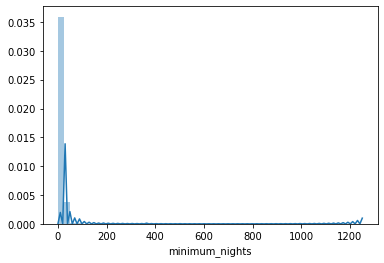

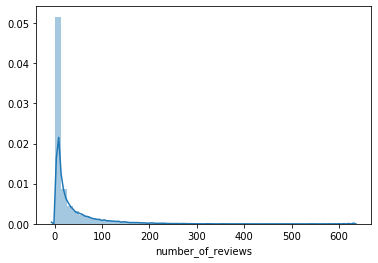

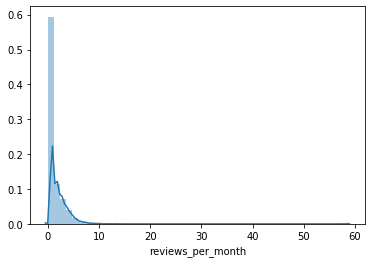

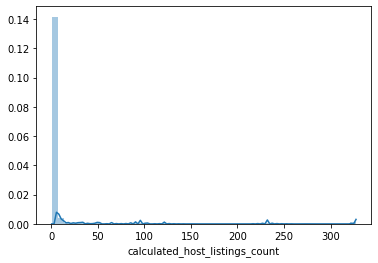

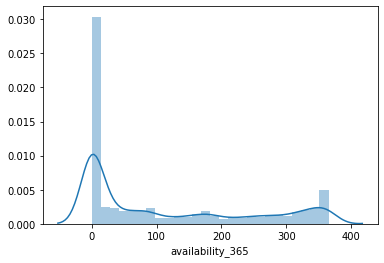

In [7]:
for col in num:
    sns.distplot(df[col])
    plt.show()

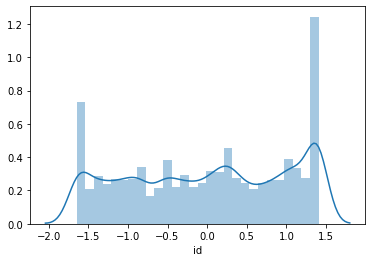

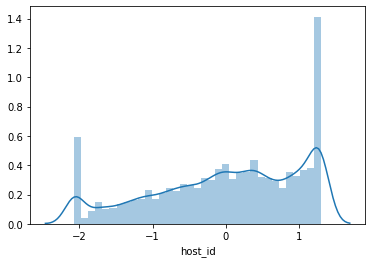

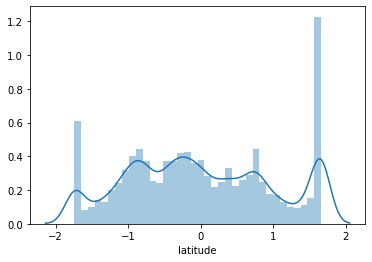

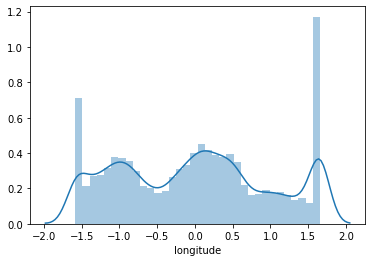

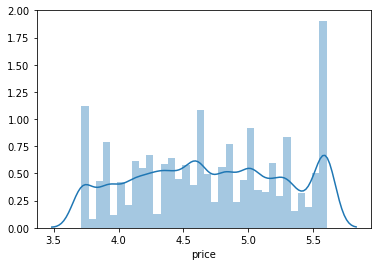

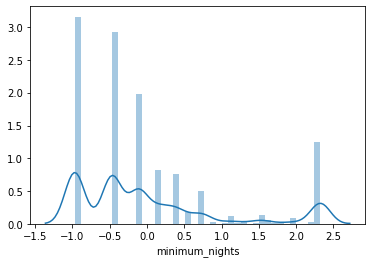

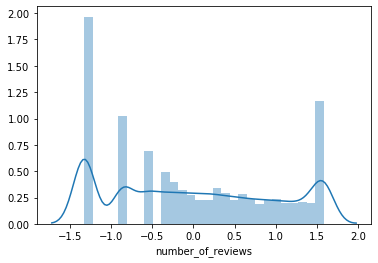

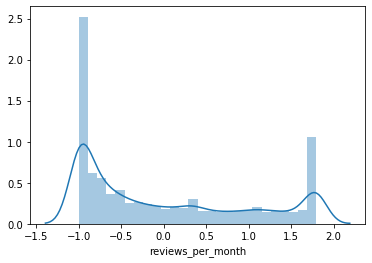

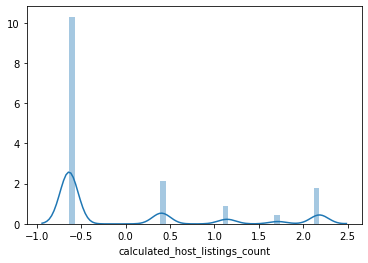

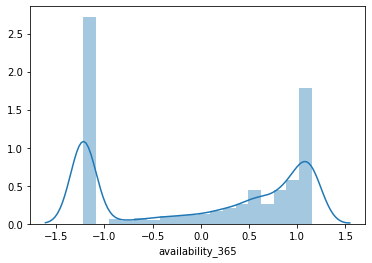

In [53]:
for col in num:
    sns.distplot(treated_df[col])
    plt.show()

In [8]:
def detect_skew(datafr):
    sk = datafr.skew()
    skewed = sk[sk>0.6]
    print(sk,'\n \n Greater than 0.6 \n',skewed)

In [9]:
def treat_skew(dataframe):
    sk = dataframe.skew()
    skewed = sk[sk>0.6]
    new_dataframe = dataframe.copy()
    for col in skewed.index.drop('longitude').tolist():
        new_dataframe[col] = np.log1p(dataframe[col])
        print(col)
    return new_dataframe

In [10]:
treated_df = treat_skew(df)

price
minimum_nights
number_of_reviews
reviews_per_month
calculated_host_listings_count
availability_365


In [11]:
detect_skew(df)

latitude                           0.239973
longitude                          1.277263
price                             18.815094
minimum_nights                    23.999268
number_of_reviews                  3.645365
reviews_per_month                  3.626118
calculated_host_listings_count     7.969708
availability_365                   0.755991
dtype: float64 
 
 Greater than 0.6 
 longitude                          1.277263
price                             18.815094
minimum_nights                    23.999268
number_of_reviews                  3.645365
reviews_per_month                  3.626118
calculated_host_listings_count     7.969708
availability_365                   0.755991
dtype: float64


In [12]:
detect_skew(treated_df)

latitude                          0.239973
longitude                         1.277263
price                             0.551689
minimum_nights                    1.496255
number_of_reviews                 0.357686
reviews_per_month                 0.942673
calculated_host_listings_count    3.303858
availability_365                 -0.200836
dtype: float64 
 
 Greater than 0.6 
 longitude                         1.277263
minimum_nights                    1.496255
reviews_per_month                 0.942673
calculated_host_listings_count    3.303858
dtype: float64


In [12]:
treated_df['last_review'] = pd.to_datetime(treated_df['last_review'])

In [13]:
treated_df['last_review'] = ((pd.to_datetime('now')-treated_df['last_review'])/np.timedelta64(1,'M'))

In [23]:
treated_df[['last_review']]

,last_review
id,
5728806,54.448406
2243769,118.843979
35515415,8.353004
36202006,118.843979
3780951,9.667199
...,...
28342248,17.486662
8438775,8.582988
27332770,11.507073


In [14]:
sc = StandardScaler()
treated_df[num.drop('price')] = sc.fit_transform(treated_df[num.drop('price')])

In [15]:
treated_df = pd.get_dummies(treated_df)

In [19]:
corr=df.corr().stack().reset_index()
corr=corr[~(corr[0]==1)].rename(columns={'level_0':'F1','level_1':'F2',0:'Value'})
corr

,F1,F2,Value
1,latitude,longitude,0.085919
2,latitude,price,0.029195
3,latitude,minimum_nights,0.024725
4,latitude,number_of_reviews,-0.014016
5,latitude,reviews_per_month,-0.014961
6,latitude,calculated_host_listings_count,0.018272
7,latitude,availability_365,-0.012063
8,longitude,latitude,0.085919
10,longitude,price,-0.151930
11,longitude,minimum_nights,-0.063447


In [ ]:
#number of reviews is highly correlated with reviews per month

In [21]:
treated_df.drop('number_of_reviews',axis=1,inplace=True)

In [16]:
treated_df.shape

(34226, 234)

In [17]:
treated_df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,...,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
id,,,,,,,,,,,,,,,,,,,,,
5728806,-0.126158,-0.925911,4.795791,0.671727,-0.390877,54.448406,-0.841806,0.352916,-1.217137,0,...,0,0,0,0,0,0,0,0,1,0
2243769,1.302892,-0.181543,7.313887,-0.928176,-1.276706,118.843979,-0.942575,-0.458048,-1.217137,0,...,0,0,0,0,0,0,0,1,0,0
35515415,0.485716,1.276213,5.303305,-0.460234,-0.248290,8.353004,1.840733,-0.458048,1.178208,0,...,0,0,0,0,0,0,0,1,0,0
36202006,-2.343446,-2.734621,3.433987,-0.460234,-1.276706,118.843979,-0.942575,0.613989,0.576071,0,...,0,0,0,0,0,0,0,0,0,1
3780951,1.486399,0.203856,4.753590,-0.928176,0.533691,9.667199,-0.529227,-0.458048,1.178208,0,...,0,0,0,0,0,0,0,0,0,1


## TEST 

In [18]:
test = pd.read_csv("Datasets\Test.csv").set_index('id')

In [19]:
num_test = num.drop('price')

In [20]:
handle_null(test)

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [24]:
detect_outliers(test[num_test])

,Feature,Number of Outliers
0,latitude,119
1,longitude,863
2,minimum_nights,2026
3,number_of_reviews,1832
4,reviews_per_month,1046
5,calculated_host_listings_count,2151
6,availability_365,0


In [109]:
treated_test = treat_outliers(test)

In [26]:
detect_skew(test)

latitude                           0.230432
longitude                          1.300628
minimum_nights                    17.306502
number_of_reviews                  3.795289
reviews_per_month                  2.498199
calculated_host_listings_count     7.850537
availability_365                   0.780870
dtype: float64 
 
 Greater than 0.6 
 longitude                          1.300628
minimum_nights                    17.306502
number_of_reviews                  3.795289
reviews_per_month                  2.498199
calculated_host_listings_count     7.850537
availability_365                   0.780870
dtype: float64


In [27]:
treated_test = treat_skew(test)

minimum_nights
number_of_reviews
reviews_per_month
calculated_host_listings_count
availability_365


In [28]:
detect_skew(treated_test)

latitude                          0.230432
longitude                         1.300628
minimum_nights                    1.503127
number_of_reviews                 0.375222
reviews_per_month                 0.968776
calculated_host_listings_count    3.225547
availability_365                 -0.192247
dtype: float64 
 
 Greater than 0.6 
 longitude                         1.300628
minimum_nights                    1.503127
reviews_per_month                 0.968776
calculated_host_listings_count    3.225547
dtype: float64


In [29]:
treated_test['last_review'] = pd.to_datetime(treated_test['last_review'])

In [30]:
treated_test['last_review'] = ((pd.to_datetime('now')-treated_test['last_review'])/np.timedelta64(1,'M'))

In [31]:
treated_test[num_test] = sc.transform(treated_test[num_test])

In [32]:
treated_test = pd.get_dummies(treated_test)

In [33]:
treated_test.shape

(14669, 223)

In [34]:
treated_df.shape

(34226, 234)

In [35]:
b = set(treated_test.columns)-set(treated_df.columns)
b

{'neighbourhood_Fort Wadsworth',
 'neighbourhood_New Dorp',
 'neighbourhood_Willowbrook',
 'neighbourhood_Woodrow'}

In [38]:
a = set(X.columns)-set(treated_test.columns)
a

{'neighbourhood_Breezy Point',
 'neighbourhood_Co-op City',
 'neighbourhood_Howland Hook',
 'neighbourhood_Mariners Harbor',
 'neighbourhood_Midland Beach',
 'neighbourhood_Mill Basin',
 'neighbourhood_Olinville',
 "neighbourhood_Prince's Bay",
 'neighbourhood_Richmondtown',
 'neighbourhood_Rossville',
 'neighbourhood_Silver Lake',
 'neighbourhood_Unionport',
 'neighbourhood_West Farms',
 'neighbourhood_Westerleigh'}

In [37]:
X = treated_df.drop(['price'],axis=1)
y = treated_df['price']

In [39]:
X.drop(list(a),axis=1,inplace=True)

In [41]:
treated_df.drop(list(a),axis=1,inplace=True)

In [42]:
treated_test.drop(list(b),axis=1,inplace=True)

In [43]:
treated_test.shape,X.shape

((14669, 219), (34226, 219))

#### Basic Vanilla Model

In [128]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [129]:
model = LinearRegression()

In [130]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
y_pred = model.predict(X_test)

In [132]:
model.score(X_test,y_test)

0.6190015443450139

In [133]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.355395916303102

### Export processed data

In [44]:
treated_df.to_csv("treated_train.csv")

In [45]:
treated_test.to_csv("treated_test.csv")